<a href="https://colab.research.google.com/github/jakeh46g/Classification-Tree-and-Random-Forest-Analysis/blob/main/ClassificationTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import packages and functions
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

salmons = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Salmons.csv')
salmons

,Customer,Spending,Card,Coupon
0,1,2291,1,0
1,2,3215,1,0
2,3,2135,1,0
3,4,3924,0,0
4,5,2528,1,0
...,...,...,...,...
995,996,804,1,0
996,997,1936,0,0
997,998,3154,0,0
998,999,1970,1,0


In [4]:
features = ['Spending', 'Card']
X = salmons[features]
y = salmons[['Coupon']]

# Initialize the model
classtreeModel = DecisionTreeClassifier(max_depth=2)

In [5]:
# Create a training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


|--- Spending <= 5140.50
|   |--- Spending <= 3895.50
|   |   |--- class: 0
|   |--- Spending >  3895.50
|   |   |--- class: 0
|--- Spending >  5140.50
|   |--- Card <= 0.50
|   |   |--- class: 0
|   |--- Card >  0.50
|   |   |--- class: 1



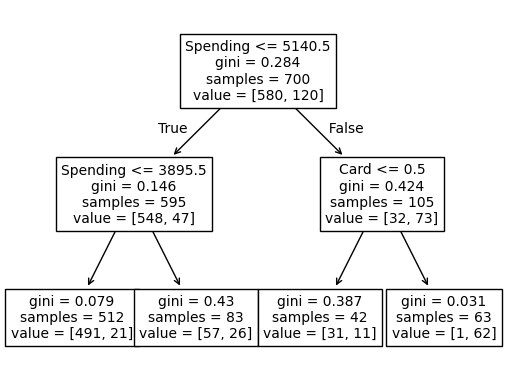

In [6]:
# Initialize the model
classtreeModel = DecisionTreeClassifier(max_depth=2)

# Fit the model
classtreeModel = classtreeModel.fit(X_train,y_train)

print(export_text(classtreeModel, feature_names=features))

p = tree.plot_tree(classtreeModel, feature_names=features, fontsize=10)


In [7]:
# Predict on the testing data
y_pred = classtreeModel.predict(X_test)
y_pred_prob = classtreeModel.predict_proba(X_test)[:, 1]

In [8]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print(f"AUC Score: {auc_score:.2f}")



Confusion Matrix:
[[241   1]
 [ 31  27]]
AUC Score: 0.85


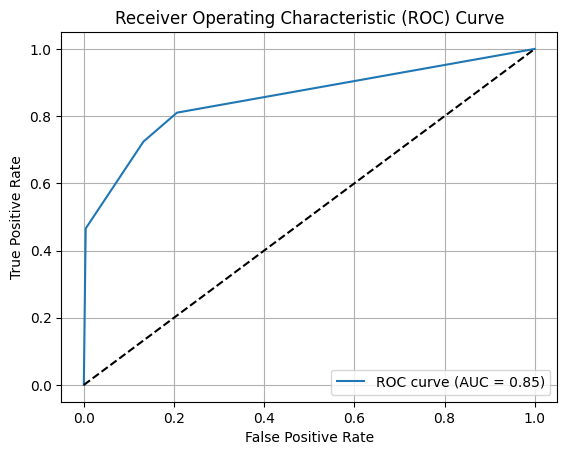

In [9]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

